# Desafío - Inferencia de tópicos con EM

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad. 
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la sección correspondiente.
___

## Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los `csv` se encuentra en la carpeta `dump`.
* Cada `csv` tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, el objetivo del ejercicio es generar un modelo probabilístico que pueda identificar el género musical más probable dado la letra de una canción.
* Para ello implementaremos un modelo conocido como Latent Dirichlet Allocation que hace uso de una variante del algoritmo EM para inferir clases latentes a partir de una matriz de documentos.

## Ejercicio 1: Preparar el ambiente de trabajo

* Importe los módulos `numpy`, `pandas`, `matplotlib`, `seaborn`, `glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta `dump`.
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en `dump` utilizando `glob.glob` y `os.getcwd()` para extraer las rutas absolutas. Posteriormente genere un objeto `pd.DataFrame` que contenga todos los csv.
* Asegúrese de eliminar la columna `Unnamed: 0` que se genera por defecto.

In [1]:
# importo librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importo librerias a utilizar
import glob
import os

# importo libreria para evitar warnings
import warnings
warnings.simplefilter('ignore')

# defino parámetros para gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

In [2]:
#Ver directorio actual
actual_dir = os.getcwd()
actual_dir

'/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desafio'

In [3]:
#obtener listado de archivos en la carpeta 'dump\'
track_list = glob.glob(actual_dir+'/dump/*.csv')
track_list

['/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desafio/dump/public_enemy_scrape.csv',
 '/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desafio/dump/mayhem_scrape.csv',
 '/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desafio/dump/raekwon_scrape.csv',
 '/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desafio/dump/immortal_scrape.csv',
 '/Users/hugopriest/Datacience 2019/Desafio Latam - Datascience/03 Machine Learning/03 Algoritmos de Clasificación (Parte II)/02 Algoritmo de Maximización de Esperanzas/Desa

In [4]:
#Crear DataFrame con la información de todos los archivos
df_append = []  # lista para guardar los datos

for file in track_list:
    #guardar los datos del archivo en un Dataframe temporal
    df_tmp = pd.read_csv(file).drop(columns='Unnamed: 0')
    
    # guardar DataFrame en una lista e ir agregando
    df_append.append(df_tmp)

# Convertir la listas en DataFrame final
df = pd.concat(df_append)
df.sample(10)

0       1                        2  \
124      Ghostface Killah  hiphop       Late Night Arrival   
82   A Tribe Called Quest  hiphop        We The People....   
11               Dua Lipa     pop                 Homesick   
29   A Tribe Called Quest  hiphop  Steve Biko (Stir It Up)   
293        Britney Spears     pop                   Sorrow   
81          Faith No More    rock             Sol Invictus   
106               Raekwon  hiphop         4 In The Morning   
21                MF Doom  hiphop               Potholderz   
5                  Weezer    rock         Surf Wax America   
291        Britney Spears     pop           Something More   

                                                     3  
124  (Wigs) \n Yeah, son, it's the Einstein Theodor...  
82   We don't believe you 'cause we the people \n A...  
11   Here, where the sky's falling \n I'm covered i...  
29   (Phife) \n Linden Boulevard represent, represe...  
293  I see you dying without pain \n Poison pumping...  
81   I'm coming Lord, I'm on my way \n Worshipping ...  
106  Did he have hands? \n Did he have a face? \n Y...  
21   (Dwight spits) \n I strive to be humble lest I...  
5    Unfortunately, we are not licensed to display ...  
291  You'll fly high \n Couldn't be better now \n Y...

In [5]:
#Renombrar columnas
df.columns = ['artist', 'genre', 'title', 'lyrics']
df.sample(5)

artist   genre                                     title  \
108  Ghostface Killah  hiphop                              Hidden Darts   
245   Michael Jackson     pop  Love's Gone Bad (1995 Anthology Version)   
64         Method Man  hiphop                         Konichiwa Bitches   
98       Public Enemy  hiphop                                        41   
25            Incubus    rock                             Azwethinkweiz   

                                                lyrics  
108  (Intro: Ghostface Killah) \n One-two, one-two,...  
245  Ah, I feel a fountain in my brain \n Ice-cold ...  
64   (Hook 2X: GZA sample) \n "Konichiwa bitches" \...  
98   I come out my crib \n Walk out on the block it...  
25   Floatin' 'round my brain \n Tryin' to think ab...

In [6]:
df.shape

(9489, 4)

## Ejercicio 2: Matriz de ocurrencias

* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`.
* Aplique la clase para extraer las 5000 palabras más repetidas en toda la base de datos.
* Con la clase inicializada, incorpore las letras con el método `fit_transform` y guarde los resultados en un nuevo objeto.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english', max_features=5000)

# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df['lyrics'])

In [9]:
count_vectorizer_fit

<9489x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 701351 stored elements in Compressed Sparse Row format>

## Ejercicio 3: Entrenamiento del Modelo

* Importe `sklearn.decomposition.LatentDirichletAllocation` y `sklearn.model_selection.GridSearchCV`.
* Genere una búsqueda de grilla con los siguientes hiperparámetros:
    - `n_components: [5, 10, 15]`.
    - `learning_decay: [0.7, 0.5]`.
* Entrene la búsqueda de grilla con las letras en un formato vectorizado con `CountVectorizer`.
* Reporte brevemente cuál es la mejor combinación de hiperparámetros.

In [10]:
# importo librerías
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [11]:
# hiperparámetros
n_components = [5, 10, 15]
learning_decay  = [.7, .5]
parametros = {'n_components':n_components, 'learning_decay':learning_decay}
parametros

{'n_components': [5, 10, 15], 'learning_decay': [0.7, 0.5]}

In [12]:
# modelo
LDA = LatentDirichletAllocation(random_state=16254)
model = GridSearchCV(LDA, param_grid=parametros, n_jobs=-1)

In [13]:
model.fit(count_vectorizer_fit)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=16254,
                                                 topic_word_prior=None,
                                  

In [14]:
model.best_params_

{'learning_decay': 0.7, 'n_components': 5}

In [15]:
model.best_score_

-3066319.444056365

In [16]:
model.best_estimator_

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=16254,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

__Comentario:__ La mejor combinación de parámetros se da con `learning_decay = 0.7` y `n_components = 5`.

## Ejercicio 4 : Inferencia e Identificación de Tópicos

* En base a la mejor combinación de hiperparámetros, entrene el modelo con la matriz de atributos de las letras.
* Para identificar de qué se trata cada tópico, necesitamos identificar las principales 15 palabras asociadas con éste. Puede implementar la siguiente línea de código para identificar las principales palabras en un tópico:

```python
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(fit_best_lda.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([counter.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))
```
* Comente a qué tópicos está asociada cada clase inferida.

In [17]:
# modelo con mejores hiperparámetros
model2 = LatentDirichletAllocation(random_state=16254, n_components=5, learning_decay=.7)

In [18]:
model2.fit(count_vectorizer_fit)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=16254,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [19]:
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(model2.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
just got know don like ll ve cause gonna said night time think come good
tópico: 2
life ll time away world eyes god die death ve la heart blood day light
tópico: 3
like shit got fuck nigga yo don ain know man niggas ya bitch em yeah
tópico: 4
love yeah don oh know baby want let wanna just come say ooh make gonna
tópico: 5
like got don cause just know ain man black em say people rock ah come


In [20]:
# mediante .components_ podemos extraer una matriz que entrega las distribución de palabras por cada tópico.
for topic_id, topic_name in enumerate(model.best_estimator_.components_):
    # para cada tópico
    print("tópico: {}".format(topic_id + 1))
    # mediante argsort logramos ordenar los elementos por magnitud
    # para los elementos más relevantes ordenados por argsort, buscamos su correlativo
    # en la matriz dispersa y devolvemos el nombre.
    # finalmente concatenamos las palabras
    print(" ".join([count_vectorizer.get_feature_names()[i] for i in topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
just got know don like ll ve cause gonna said night time think come good
tópico: 2
life ll time away world eyes god die death ve la heart blood day light
tópico: 3
like shit got fuck nigga yo don ain know man niggas ya bitch em yeah
tópico: 4
love yeah don oh know baby want let wanna just come say ooh make gonna
tópico: 5
like got don cause just know ain man black em say people rock ah come


In [21]:
df['genre'].unique()

array(['hiphop', 'metal', 'pop', 'rock'], dtype=object)

__Comentario:__ Al parecer las clases están asociadas de la siguiente manera:
* `hiphop`: tópico 3
* `metal`: tópico 2
* `pop`: tópico 4
* `rock`: tópico 1 y 5

## Ejercicio 5: Identificación de probabilidades

* En base a la información generada, es posible identificar cuales van a ser los géneros más probables de ocurrir para un artista.
* Para ello necesitamos guardar la probabilidad de cada canción en nuestra base de datos original. Podemos implementar esto de la siguiente manera:

```python
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = best_lda.transform(transformed_feats)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
    # pasamos esta matriz y la redondeamos en 3 decimales
    np.round(fit_best_lda, 3),
    # agregamos un índice
    index=df_lyrics.index
)
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, best_lda.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df_lyrics, topics_for_each_doc], axis=1)

# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(docs_topics.values, axis=1) + 1
```

* Genere una matriz de correlaciones entre la probabilidad de tópicos inferidos. Comente brevemente cuales son las principales asociaciones existentes.
* Con esta nueva base de datos, identifique las probabilidades de pertenencia para un artista específico.
* Grafique la distribución de las probabilidades para algún artista en específico.

In [22]:
# generamos una transformación de los datos a distribución de tópico por palabra en el documento
fit_best_lda = model2.transform(count_vectorizer_fit)
# estra transformación la podemos coercionar a un dataframe de la siguiente manera
topics_for_each_doc = pd.DataFrame(
                                   # pasamos esta matriz y la redondeamos en 3 decimales
                                   np.round(fit_best_lda, 3),
                                   # agregamos un índice
                                   index=df['lyrics'].index
                                   )
#agregamos identificadores de columna
topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x), range(1, model2.n_components + 1)))
# concatenamos las probabilidades de tópico por documento a nuestra matriz original
concatenated_df = pd.concat([df[['artist', 'genre', 'title']], topics_for_each_doc], axis=1)
# argmax en la matriz de tópicos
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values, axis=1) + 1

In [23]:
concatenated_df.head()

artist   genre                   title   T: 1   T: 2   T: 3   T: 4  \
0  Public Enemy  hiphop  You're Gonna Get Yours  0.408  0.001  0.001  0.001   
1  Public Enemy  hiphop     Sophisticated Bitch  0.406  0.001  0.265  0.001   
2  Public Enemy  hiphop      Miuzi Weighs A Ton  0.082  0.001  0.001  0.001   
3  Public Enemy  hiphop                Timebomb  0.105  0.010  0.032  0.043   
4  Public Enemy  hiphop          Too Much Posse  0.207  0.090  0.393  0.002   

    T: 5  highest_topic  
0  0.590              5  
1  0.328              1  
2  0.916              5  
3  0.810              5  
4  0.308              3

In [24]:
concatenated_df.columns

Index(['artist', 'genre', 'title', 'T: 1', 'T: 2', 'T: 3', 'T: 4', 'T: 5',
       'highest_topic'],
      dtype='object')

In [31]:
# Analiso las canciones por tópico y por genero
concatenated_df.groupby(['genre','highest_topic']).size()

genre   highest_topic
hiphop  1                 285
        2                  81
        3                1396
        4                 122
        5                 651
metal   1                 106
        2                1329
        3                  20
        4                  91
        5                  36
pop     1                 262
        2                 160
        3                 209
        4                 540
        5                  61
rock    1                1303
        2                1346
        3                  67
        4                1238
        5                 186
dtype: int64

__Comentario:__ Con esto podemos ver la tendencia de cada tópico respecto al género. Podemos ver que:
* __hiphop__: La tendencia se asocia al __tópico 3__.
* __metal__: La tendencia se asocia al __tópico 2__.
* __pop__: Acá la tendencia no es tan marcada pero se puede asociar al __tópico 4__.
* __rock__: Acá tampoco la tendencia es tan marcada, incluso tres tópicos se pueden asociar: __topicos 1, 2 y 4__.

In [32]:
concatenated_df.columns

Index(['artist', 'genre', 'title', 'T: 1', 'T: 2', 'T: 3', 'T: 4', 'T: 5',
       'highest_topic'],
      dtype='object')

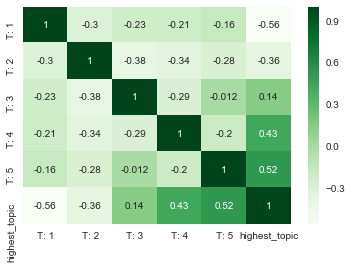

In [35]:
# Matriz de correlación
sns.heatmap(concatenated_df.corr(), cmap='Greens', annot=True)

__Comentarios:__ Entre los tópicos no se aprecia alguna correlación, sin embargo podemos ver que los tópicos más comunes se asocian al tópico 4 y al rópico 5.

In [27]:
# Verifico los artistas con más canciones
concatenated_df['artist'].value_counts()

Eminem                      493
Bruce Springsteen           467
Bob Dylan                   447
Britney Spears              323
Nicki Minaj                 282
Michael Jackson             279
Kanye West                  273
The Beatles                 265
Ghostface Killah            255
The Smashing Pumpkins       254
Weezer                      251
Mobb Deep                   231
Red Hot Chili Peppers       226
Kiss                        219
The Doors                   214
Public Enemy                198
Megadeth                    190
Queen                       188
Iron Maiden                 185
Raekwon                     184
De La Soul                  174
Cannibal Corpse             171
Anthrax                     170
Rush                        167
Metallica                   155
Modest Mouse                154
Radiohead                   151
Slayer                      147
The Clash                   145
Pink Floyd                  135
                           ... 
Kendrick

In [28]:
# creo una función donde muestro las distribuciones de cada tópico para cierto artista
def topic_for_artist(df, artist):
    df_tmp = df[df['artist'] == artist].loc[:,'T: 1':'T: 5']
    plt.figure(figsize=(14,4))
    for i, t in enumerate(df_tmp.columns):
        plt.subplot(1,5,i+1)
        sns.distplot(df_tmp[t])
    plt.suptitle(artist)
    plt.tight_layout()
    plt.show()

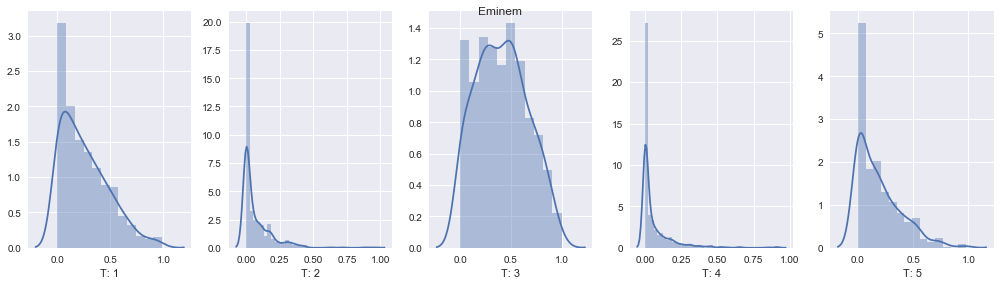

In [29]:
# Vemos las distribuciones para el artista con más representatividad
topic_for_artist(concatenated_df, 'Eminem')

__Comentarios__: Sin conocer a Eminem podemos decir que de las canciones analizadas, la tendencia se inclina hacia el __tópico 3__ el cual asociamos anteriormente al __hiphop__.

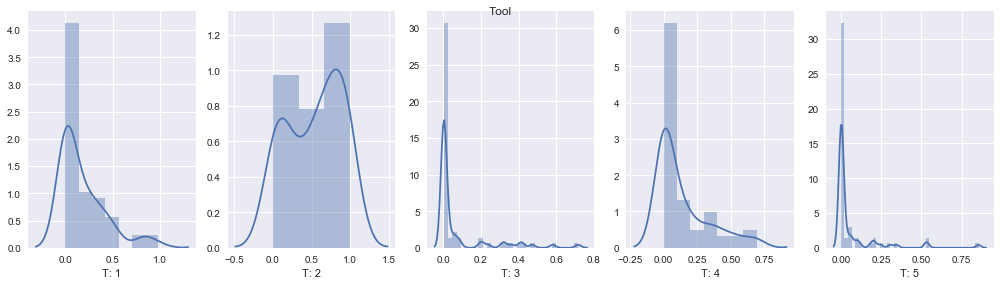

In [36]:
# Vemos las distribuciones para Tool porque es una muy buena banda !
topic_for_artist(concatenated_df, 'Tool')

__Comentarios__: Dadas las expectativas del nuevo album tan esperado después de 13 años, este análisis posiciona a __Tool__ como una banda de metal.

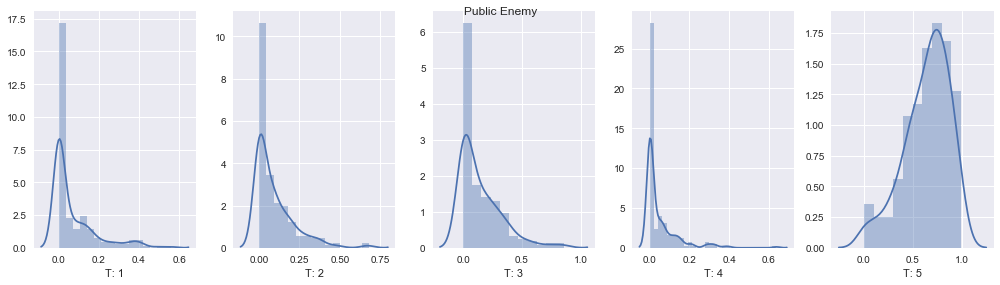

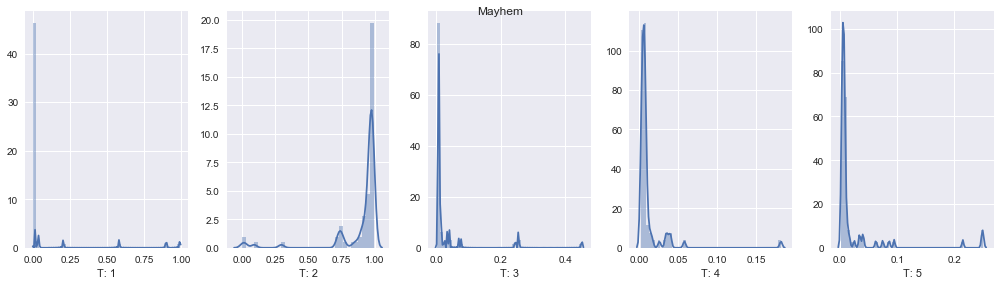

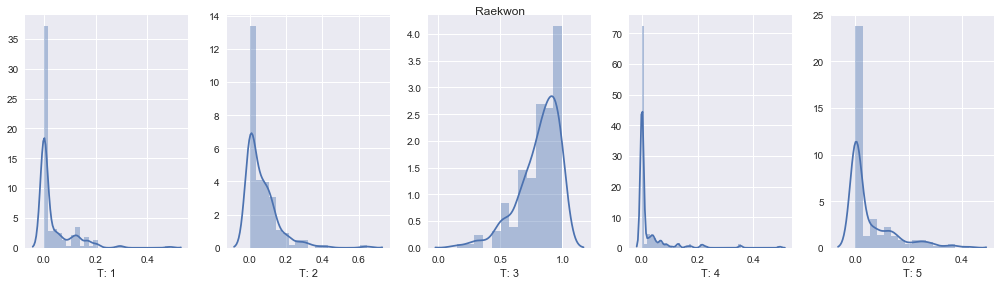

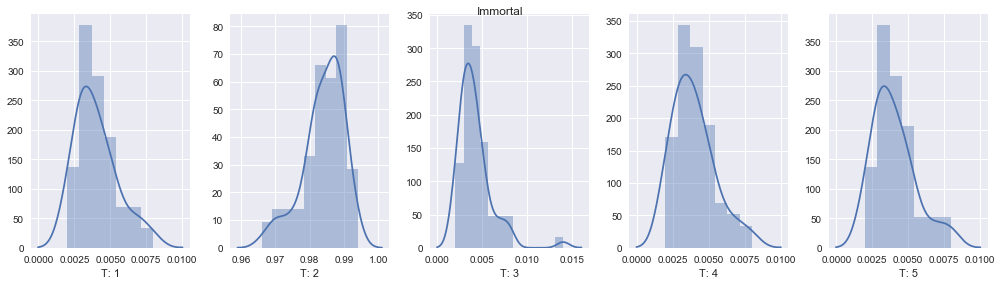

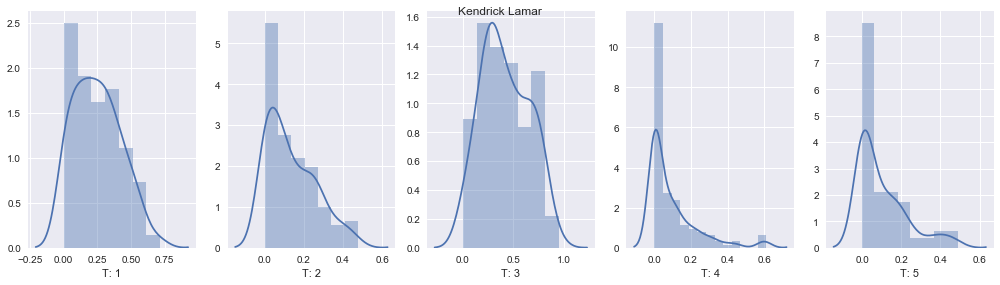

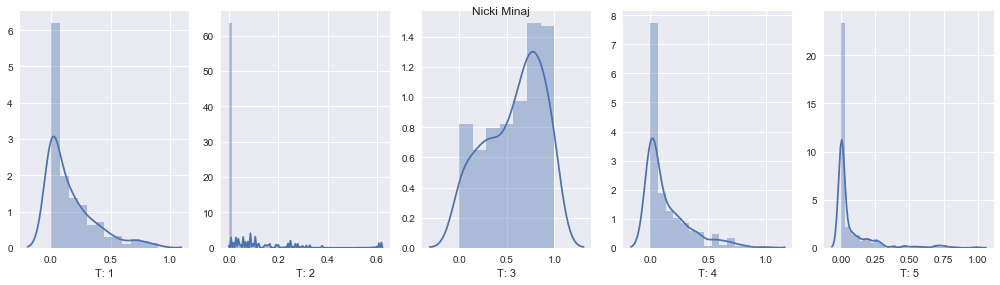

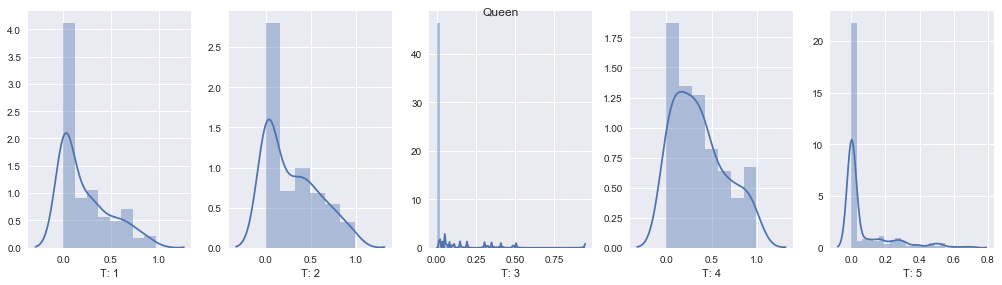

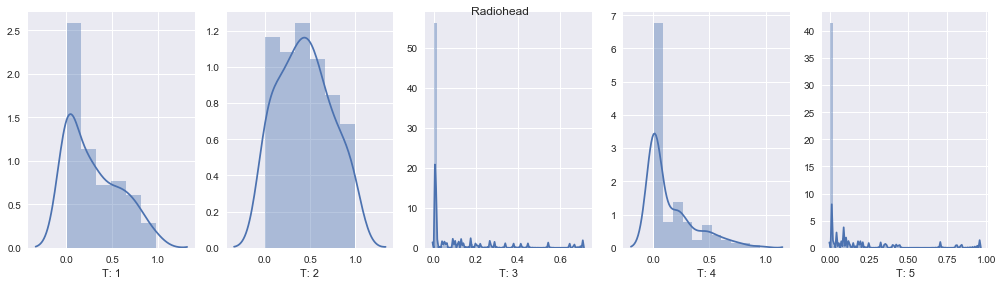

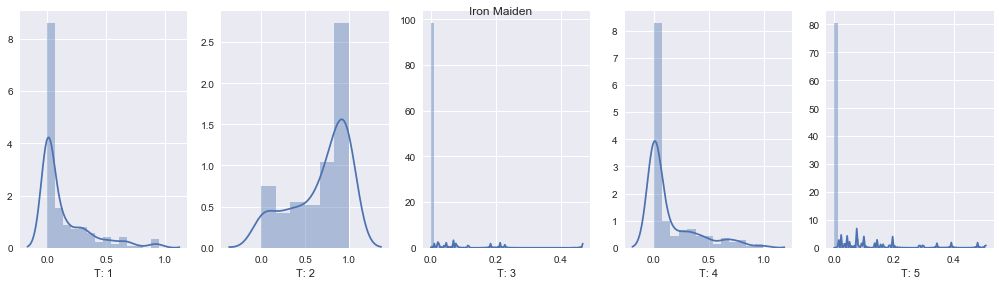

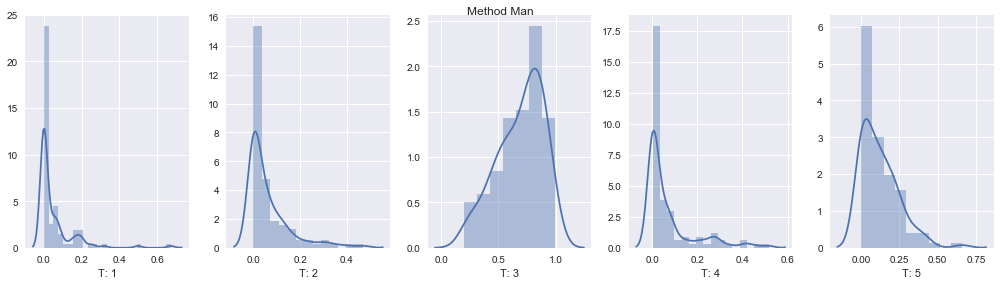

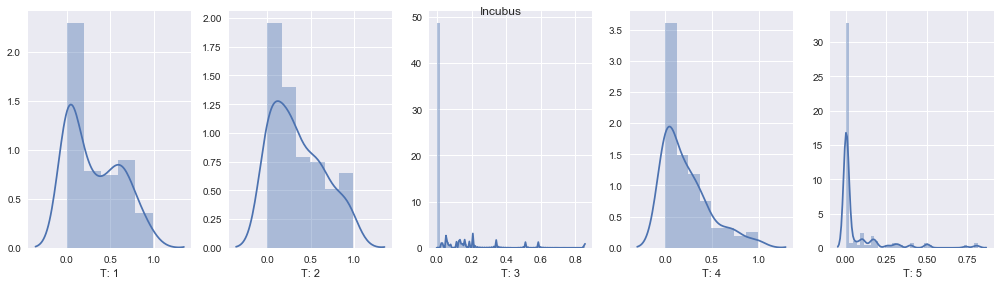

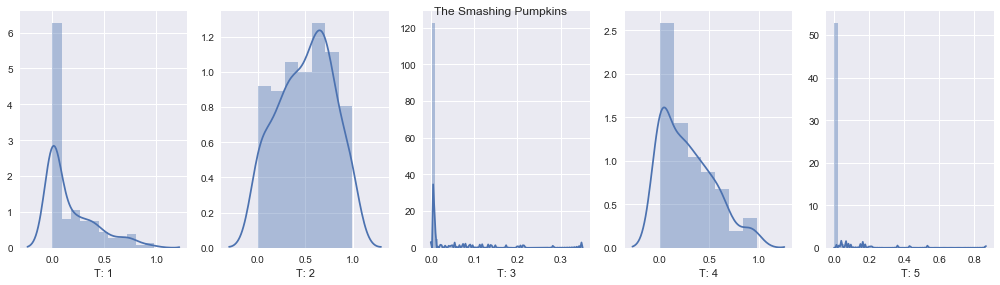

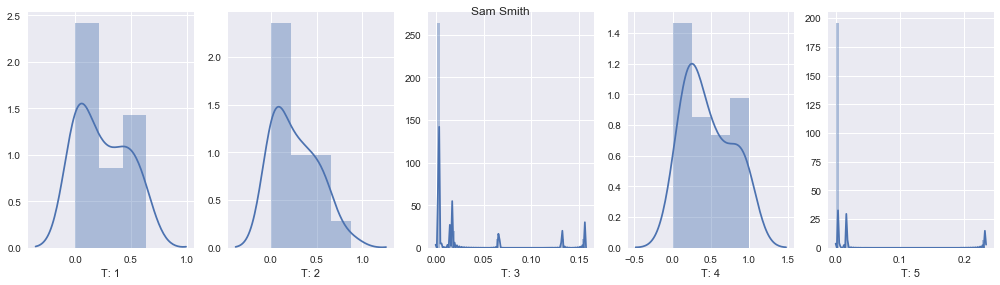

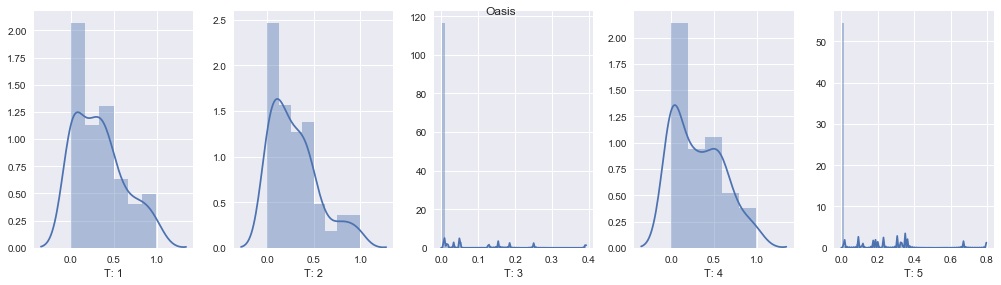

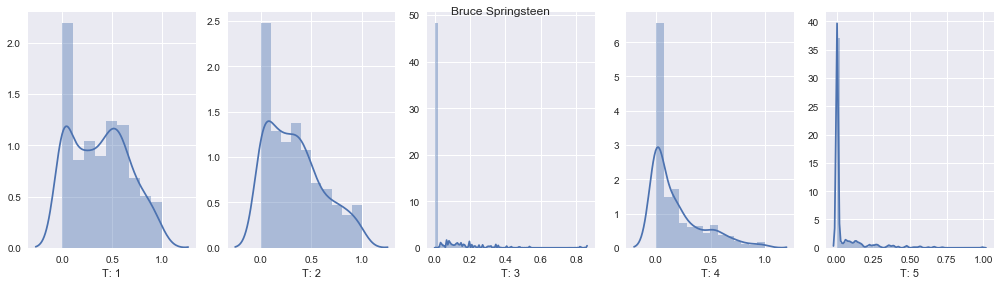

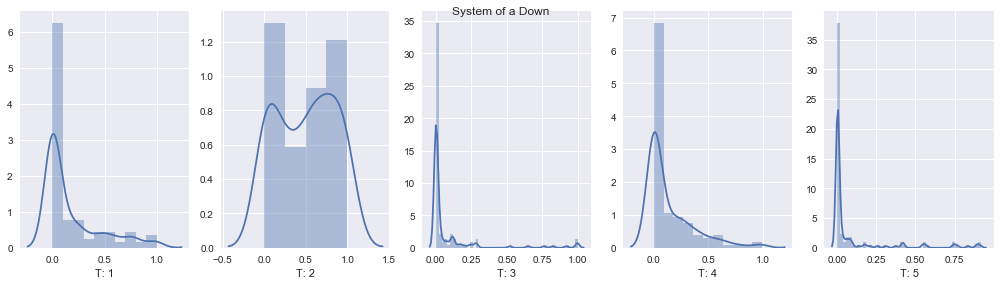

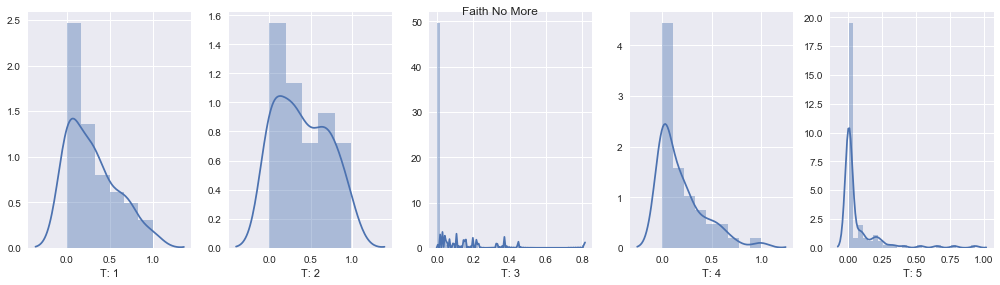

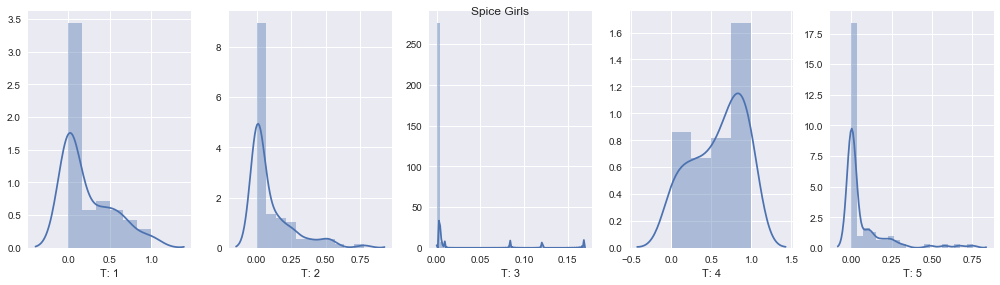

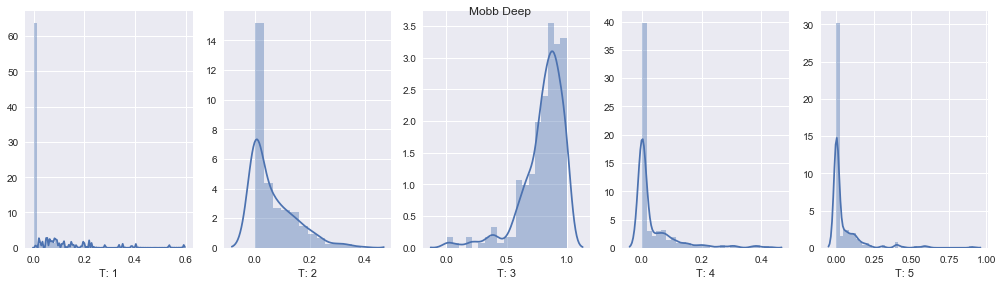

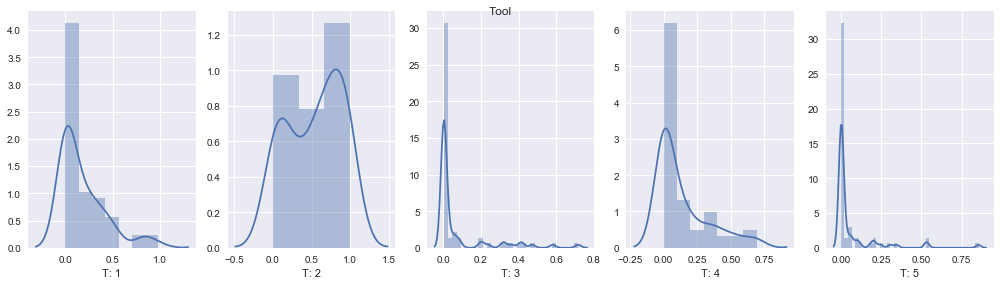

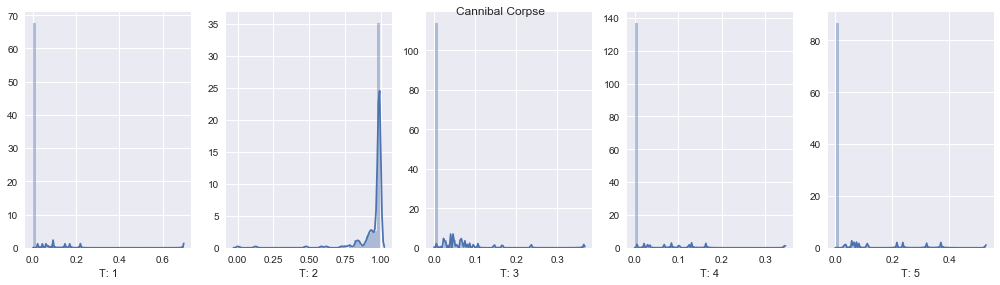

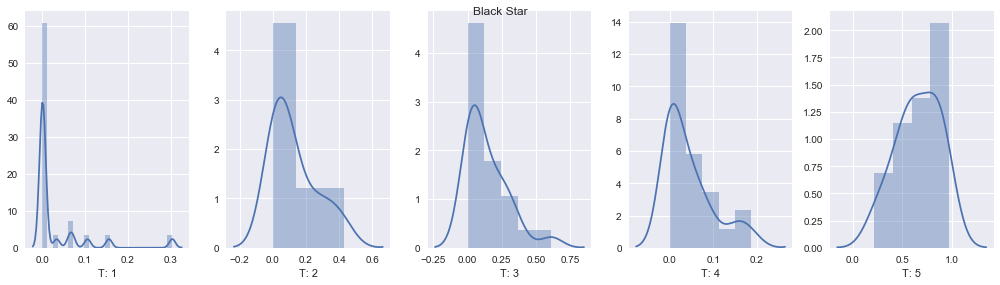

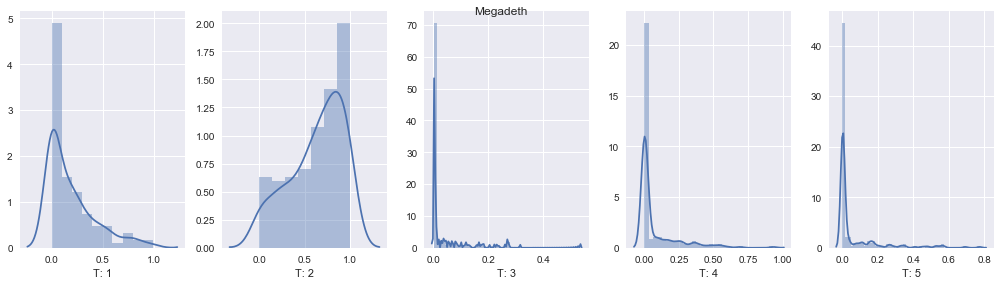

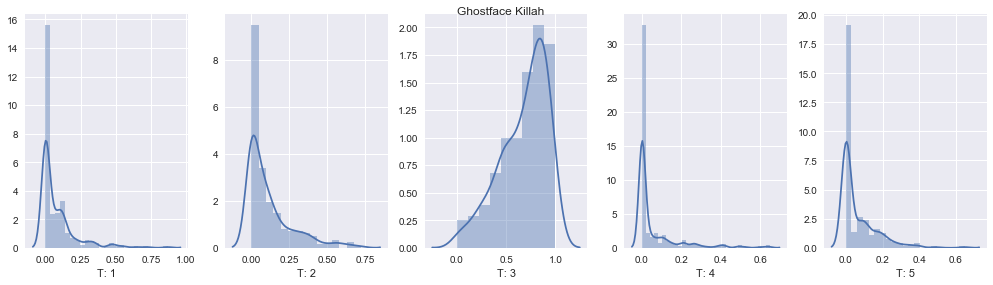

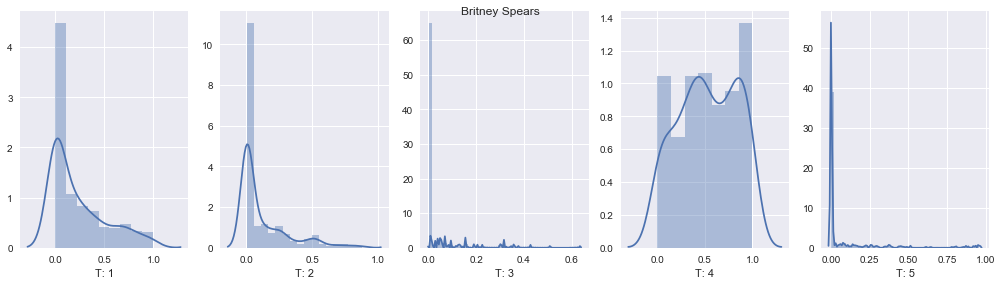

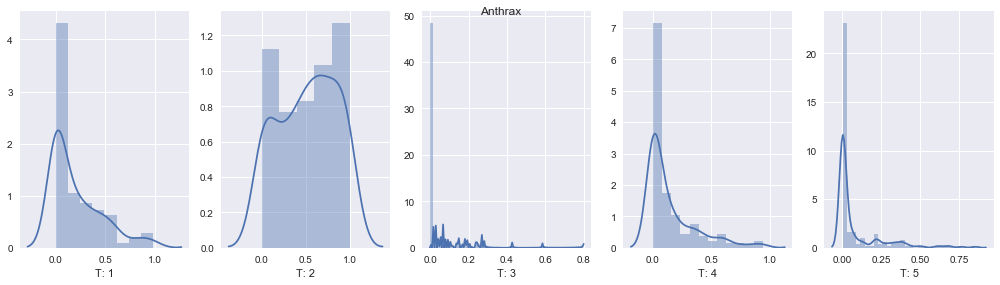

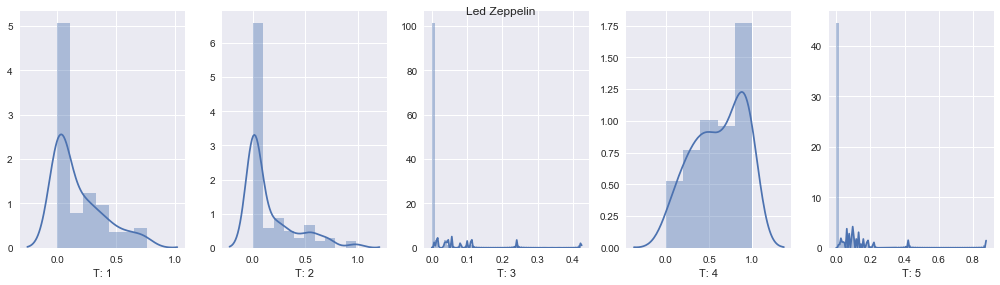

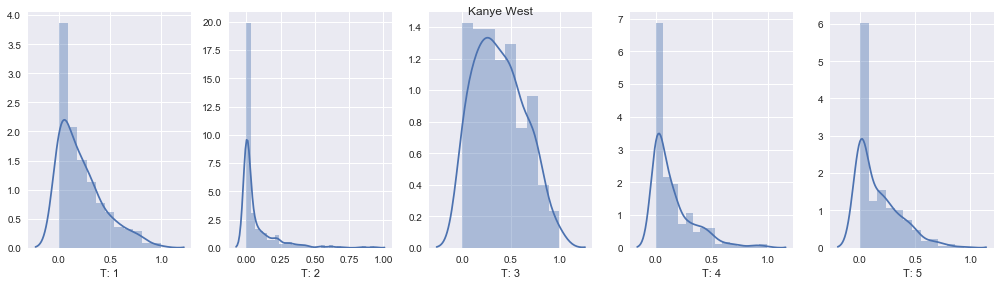

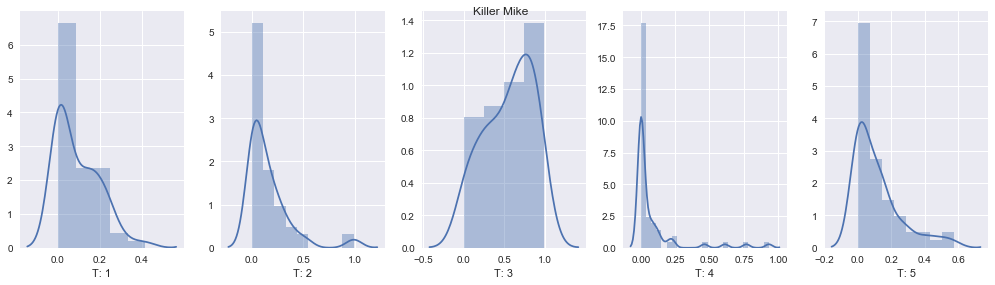

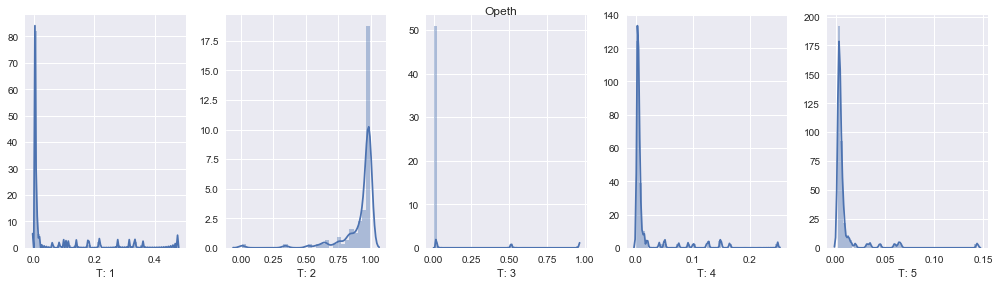

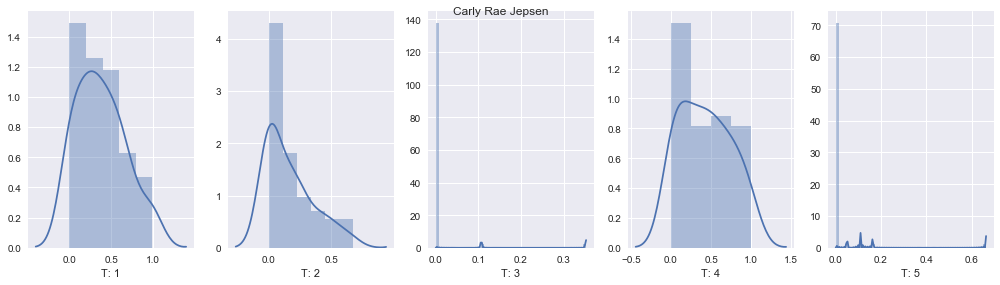

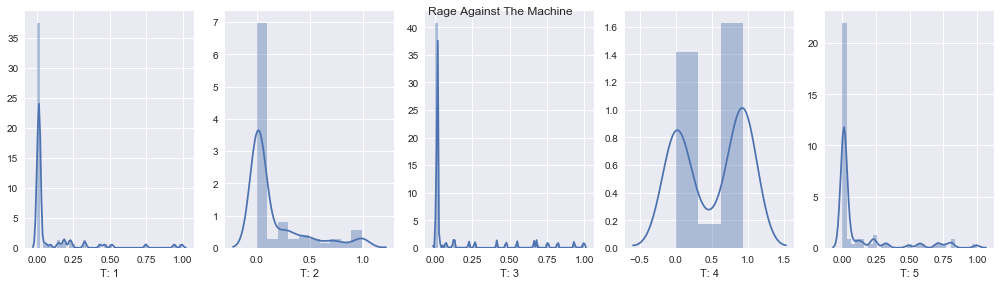

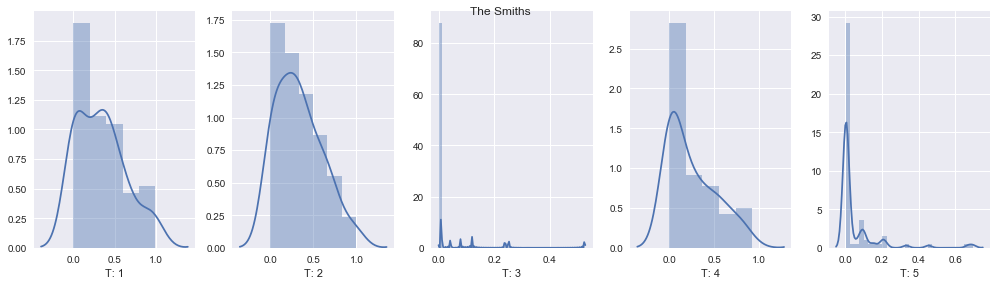

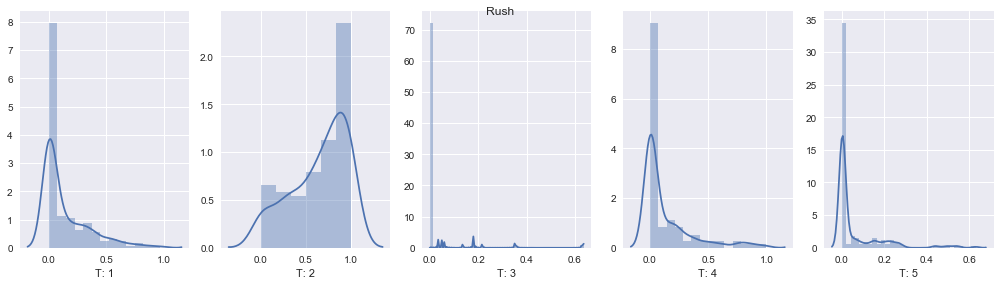

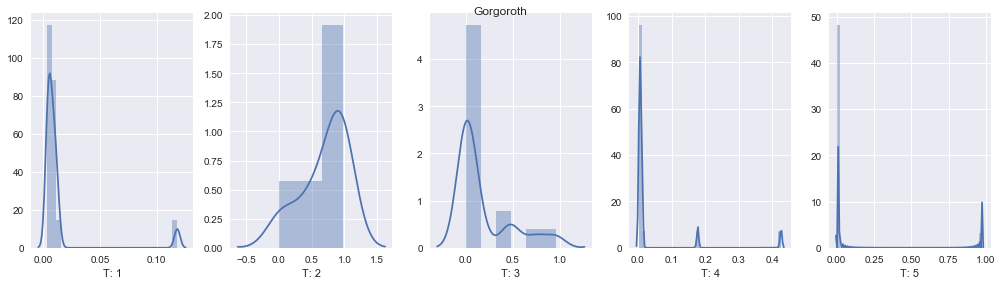

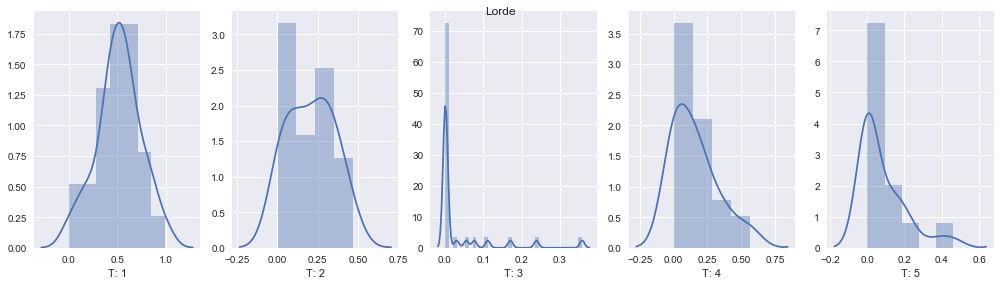

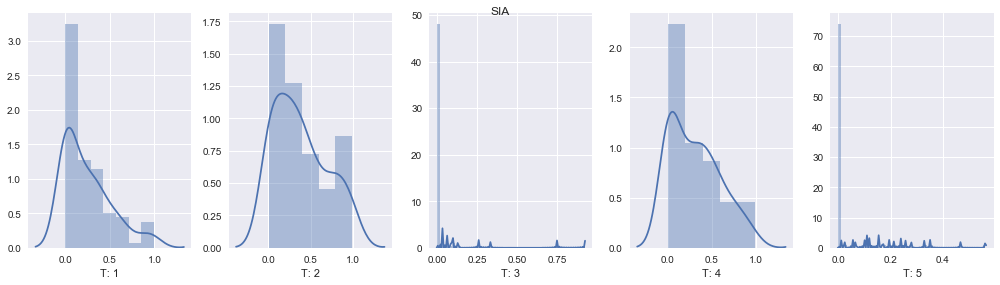

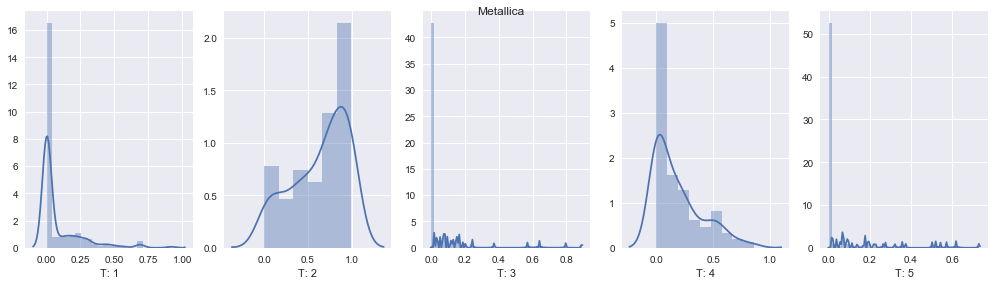

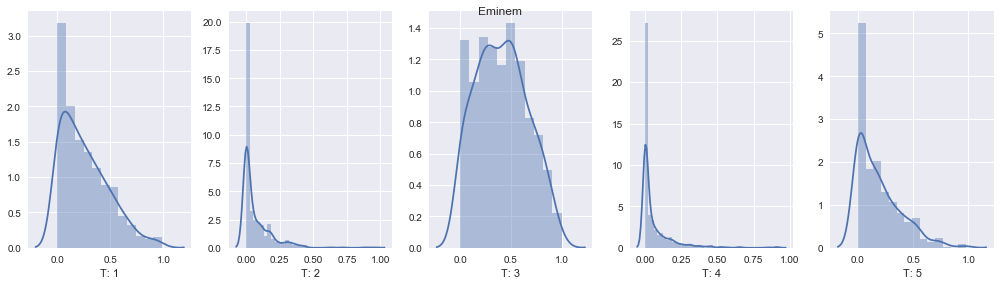

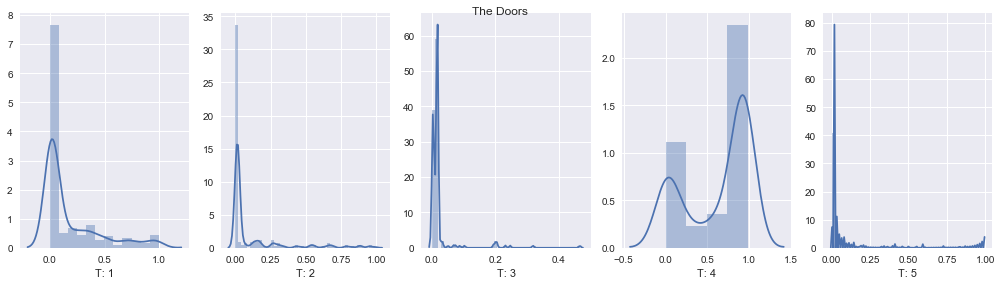

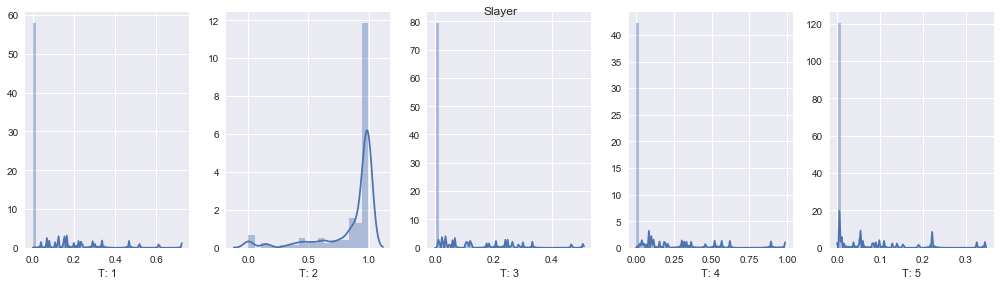

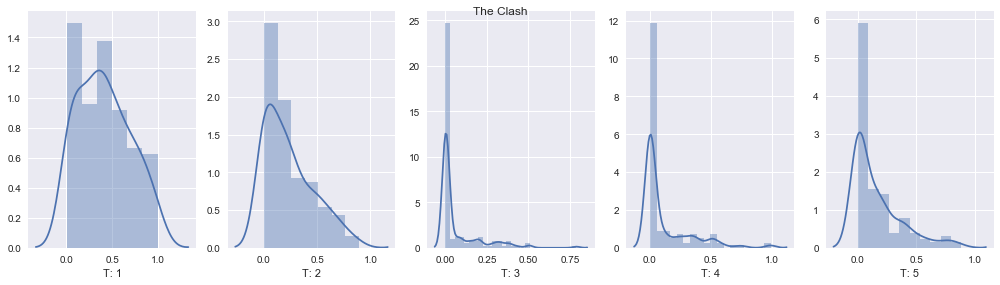

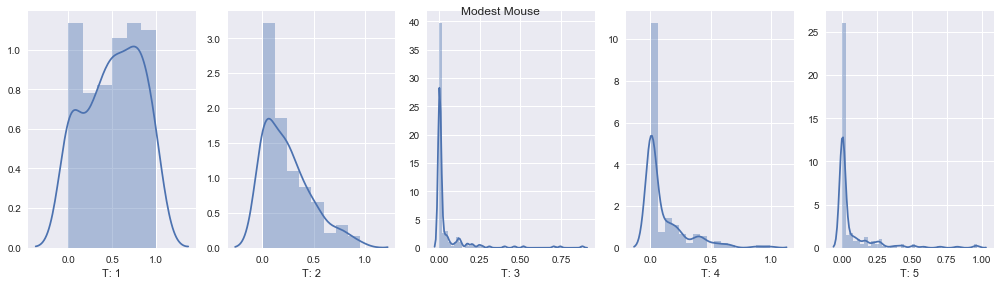

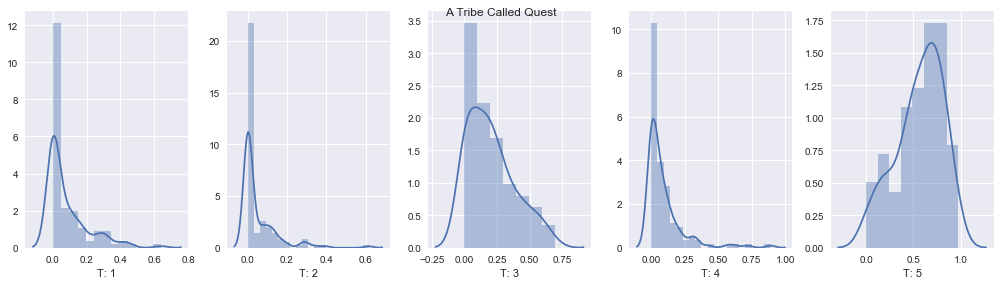

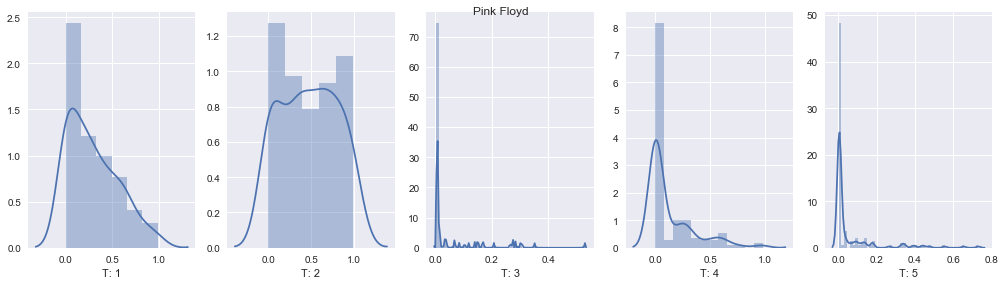

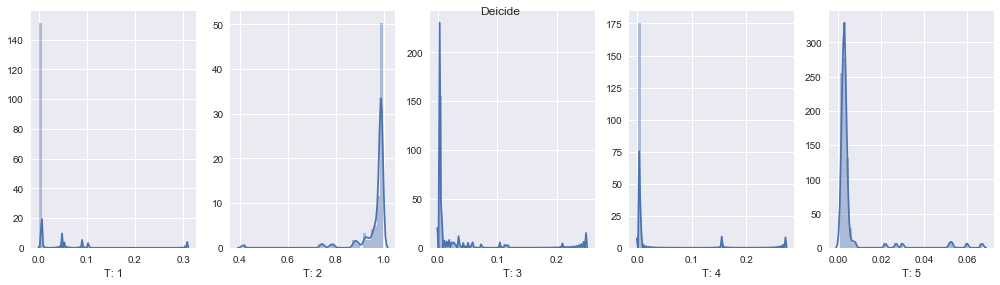

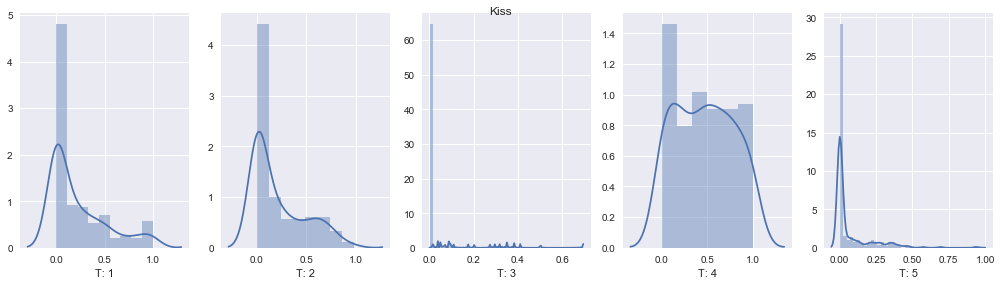

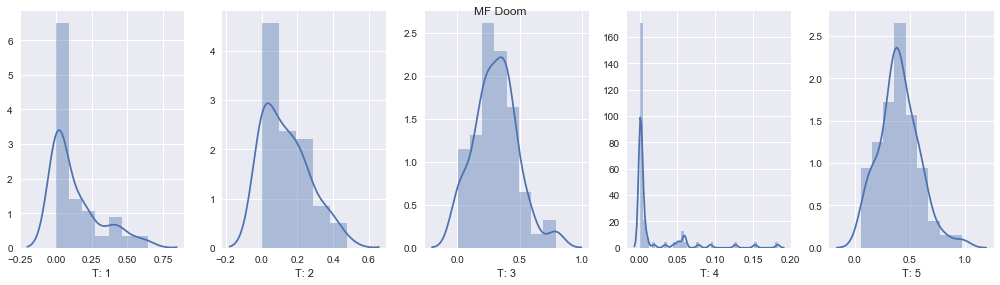

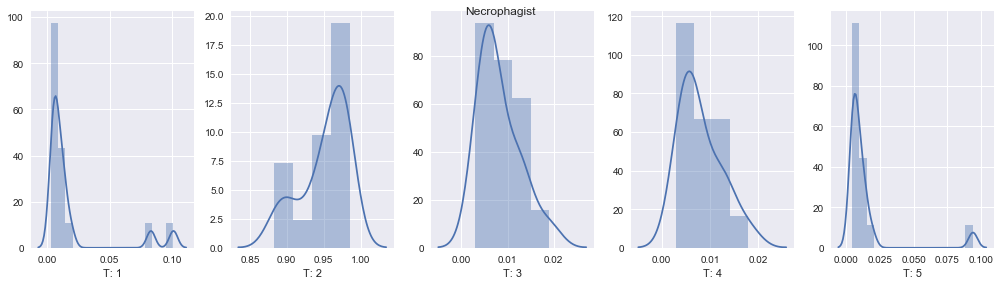

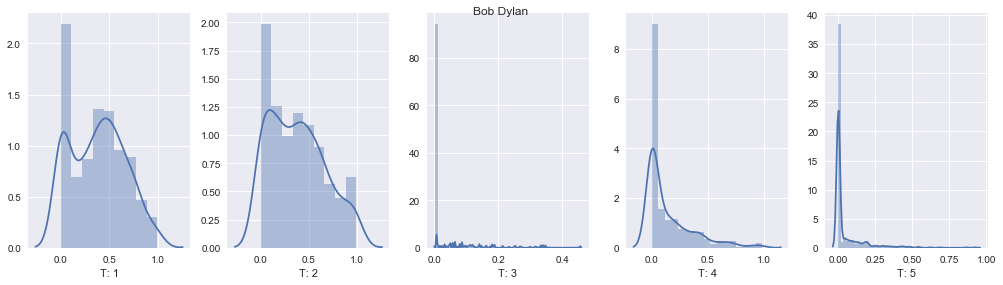

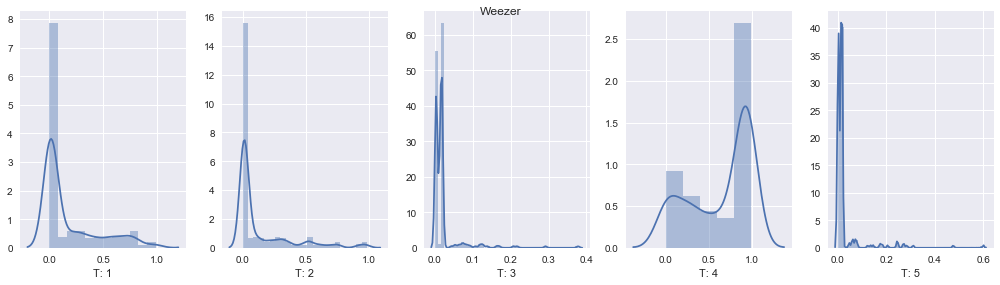

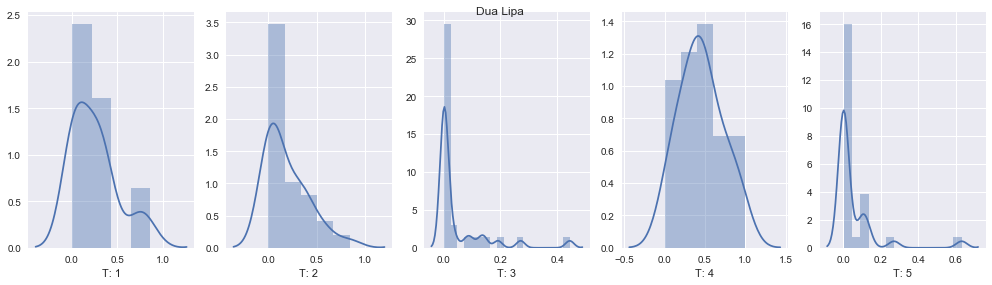

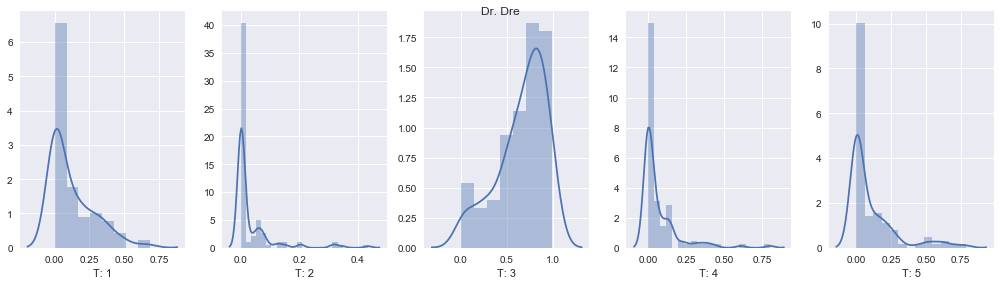

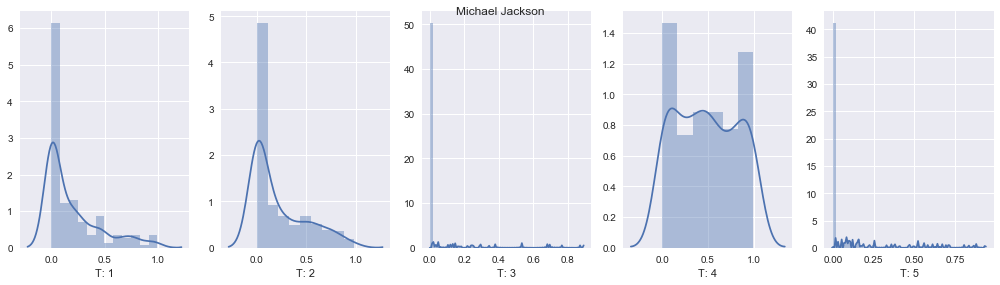

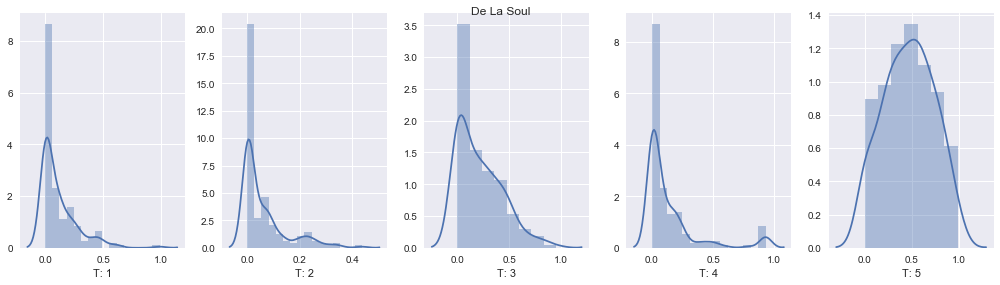

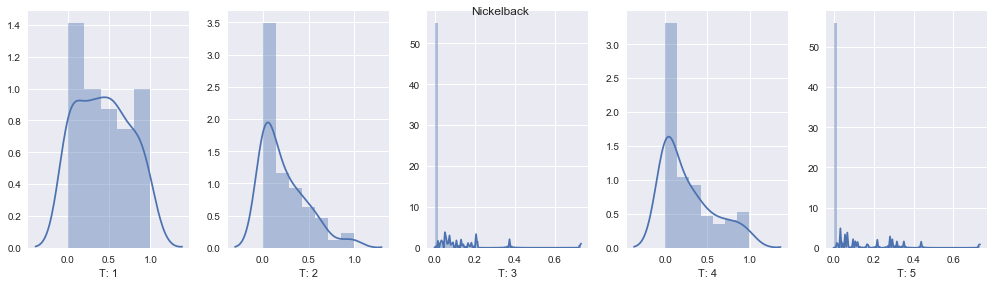

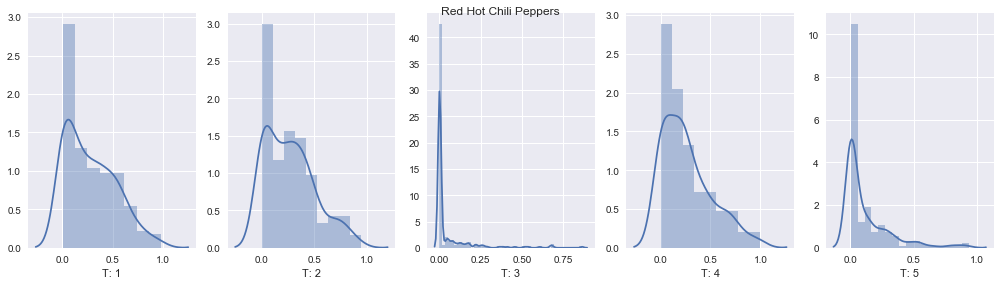

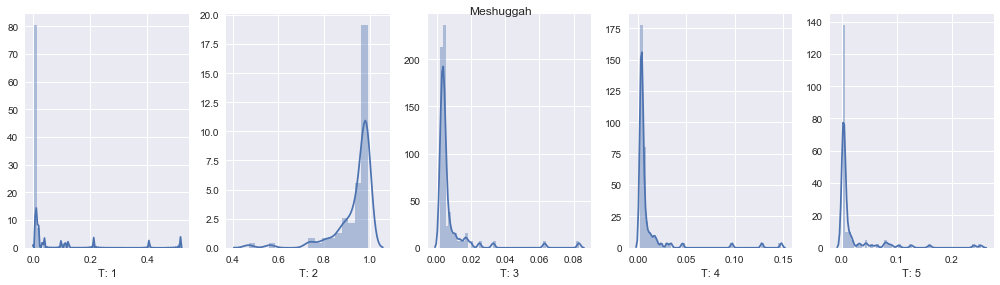

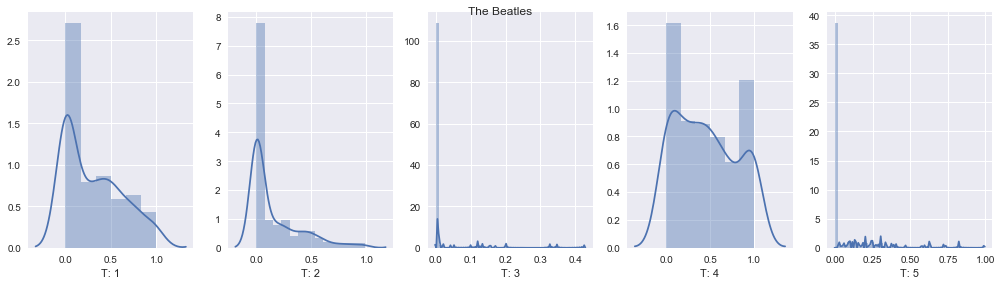

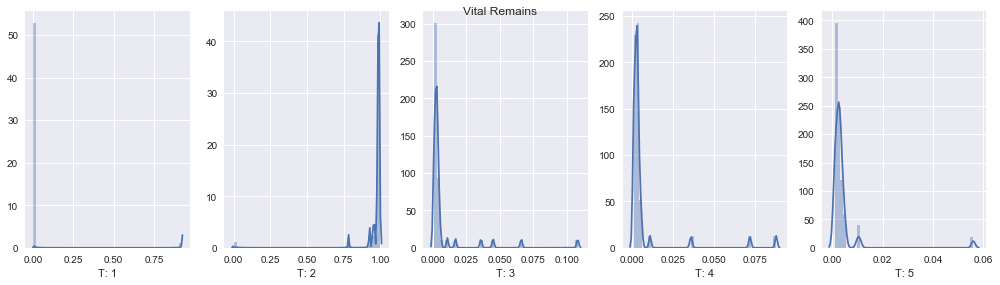

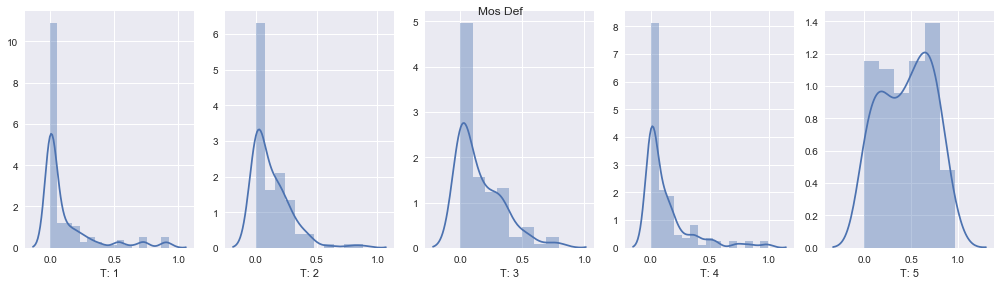

In [30]:
# Podemos revisar a todos los artistas analizados
for art in concatenated_df['artist'].unique():
    topic_for_artist(concatenated_df, art)